In [1]:
exec(open("inc_notebook.py").read())

current working dirF:\myProjects\tfKeras\UCSC\Opensource\DoodleForPicStory


In [2]:
import logging, sys, math,os
exec(open("classifiers/initKeras.py").read())

Using TensorFlow backend.


In [3]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Convolution2D, MaxPooling2D
# from keras.layers.convolutional import ZeroPadding2D
# from keras.utils import np_utils
# from keras.models import load_model
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib qt
import seaborn as sns
sns.set(style="darkgrid")

if sys.modules.get( 'library.LivePlotKeras', False ) != False :
    del sys.modules['library.LivePlotKeras'] 
if sys.modules.get( 'LivePlotKeras', False ) != False :
    del sys.modules['LivePlotKeras'] 
from library.LivePlotKeras import *

logging.warning( "LivePlotKeras loaded" )

livePlotKeras = LivePlotKeras()

In [4]:
if sys.modules.get( 'dataProcessors.DoodleDataStats', False ) != False :
    del sys.modules['dataProcessors.DoodleDataStats'] 
if sys.modules.get( 'DoodleDataStats', False ) != False :
    del sys.modules['DoodleDataStats'] 
    
from dataProcessors.DoodleDataStats import DoodleDataStats
dataStats = DoodleDataStats("folder")
dataStats.loadFromPersistentCacheByDate(datetime(2019, 11, 21))

{'folder': 'data/quickdraw-raw',
 'countClasses': 4,
 'countItems': 508536,
 'classes': {'alarm_clock': 123399,
  'baseball_bat': 123809,
  'bicycle': 126527,
  'The_Eiffel_Tower': 134801},
 'maxPerClass': 134801}

In [5]:
if sys.modules.get( 'dataProcessors.DoodleDataGeneratorByClass', False ) != False :
    del sys.modules['dataProcessors.DoodleDataGeneratorByClass'] 
if sys.modules.get( 'DoodleDataGeneratorByClass', False ) != False :
    del sys.modules['DoodleDataGeneratorByClass'] 
    
from dataProcessors.DoodleDataGeneratorByClass import DoodleDataGeneratorByClass

trainGenerator = DoodleDataGeneratorByClass(dataStats.stats,split=0.7, part='first', batch_size = 32, batchesPerEpoch = 100)
validationGenerator = DoodleDataGeneratorByClass(dataStats.stats,split=0.7, part='second', batch_size = 32, batchesPerEpoch = 30)

In [6]:


model = Sequential()
model.add(Convolution2D(64, 5, 5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, 5, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(.20))
model.add(Dense(4, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy', metrics.MSE])

Instructions for updating:
Colocations handled automatically by placer.


D:\ProgramData\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


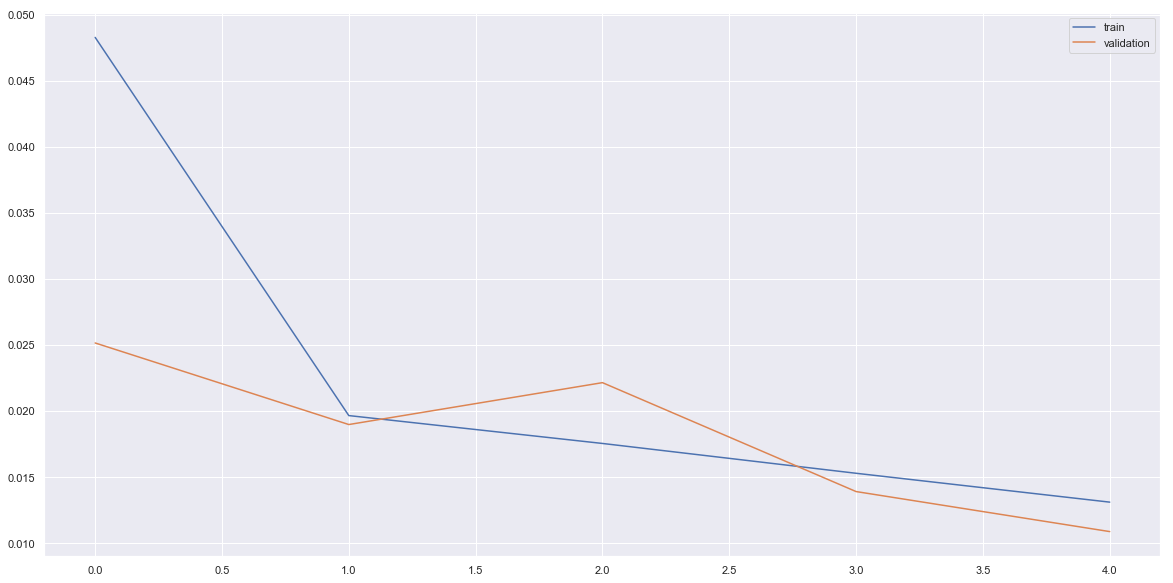

In [7]:
history = model.fit_generator( 
                    generator=trainGenerator,
                    validation_data=validationGenerator,
                    use_multiprocessing=False, 
                    workers=3, 
                    initial_epoch = 0,
                    epochs=5,
                    max_q_size = 100,
                    steps_per_epoch = trainGenerator.n_batches,
                    validation_steps = validationGenerator.n_batches,
                    callbacks = [livePlotKeras]
                   )